# Homework 2

Done by:
* Name: Deyan Milchev
* Specialty: Computer science
* Course: 3
* Group: 7
* Faculty number: 0MI0800126

## Description
Basketball team TeamBasket has a problem: athletes that has recently joined the team are soon leaving. The team needs players that play for a longer period of time, because they need time to get used to each other. This is why the HR team wants to use ML algorithms to try and predict which athletes are going to play for longer.

## Data description
In the data folder there is a CSV, file with all the information that we can use to solve the task. Here is a description of every columns:

* Name - name of the player. 
* GamesPlayed - number of games played with the team.
* MinutesPlayed - minutes spent in game with the team.
* PointsPerGame - avarage points scored by the player per game. 
* FieldGoalsMade - number of field goals made by the player.
* FieldGoalsAttempt - number of field goals attempts by the player.
* FieldGoalsPercent - percent of sucessfull field goal attempts. 
* 3PointMade - number of field goals that bring 3 points made by the player.
* 3PointAttempt - number of field goal attempts that bring 3 points made by the player. 
* 3PointPercent - percent of sucessfull field goal attempts that bring 3 points. 
* FreeThrowMade - number of sucessfull free throws. 
* FreeThrowAttempt - total number of free throw attempts. 
* FreeThrowPercent - percent of sucessfull free throws.
* OffensiveRebounds - number of continued atacks.
* DefensiveRebounds - number of stopped atacks. 
* Rebounds - number of tries for rebound - defensive and offensive.
* Assists - number of assists. 
* Steals - number of stollen balls. 
* Blocks - number of blocks. 
* Turnovers - number of counter-atacks, started by the player. 

## Requirments
* Use unsupervised learning. 
* Analyse the data.
* Check for missing values. Handle them accordingly.
* Check for outliers. Handle them accordingly.
* Check for correlations between the data. Visualize what you have found with pandas, matplotlib and seaborn. Show at least five plots. Show at least one dendogram.
* Perform dimensionality reduction. Reduce the features to two. 
* Compare at least 4 different clustering algorithms. 
* Check if a bigger number of clusters is, groups the data better.

Analyse the data, document everything and create a model that will predict if a player will be in the team for at least 5 years.

#### Note
First think I see about the data is that, columns FieldGoalPercent, 3PointPercent and FreeThrowPercent can be calculated by the other two columns that represent the sucessfull attempts and total attempts.

In [74]:
%reset -f

#### Imports

In [75]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [76]:
df = pd.read_csv('data/basketball_performance.csv')

In [77]:
df.head()

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


#### Exploratory data analysis

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1340 non-null   int64  
 1   Name               1340 non-null   object 
 2   GamesPlayed        1340 non-null   int64  
 3   MinutesPlayed      1340 non-null   float64
 4   PointsPerGame      1340 non-null   float64
 5   FieldGoalsMade     1340 non-null   float64
 6   FieldGoalsAttempt  1340 non-null   float64
 7   FieldGoalPercent   1340 non-null   float64
 8   3PointMade         1340 non-null   float64
 9   3PointAttempt      1340 non-null   float64
 10  3PointPercent      1329 non-null   float64
 11  FreeThrowMade      1340 non-null   float64
 12  FreeThrowAttempt   1340 non-null   float64
 13  FreeThrowPercent   1340 non-null   float64
 14  OffensiveRebounds  1340 non-null   float64
 15  DefensiveRebounds  1340 non-null   float64
 16  Rebounds           1340 

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1340.0,669.500000,386.968991,0.0,334.750,669.50,1004.25,1339.0
GamesPlayed,1340.0,60.414179,17.433992,11.0,47.000,63.00,77.00,82.0
MinutesPlayed,1340.0,17.624627,8.307964,3.1,10.875,16.10,22.90,40.9
PointsPerGame,1340.0,6.801493,4.357545,0.7,3.700,5.55,8.80,28.2
FieldGoalsMade,1340.0,2.629104,1.683555,0.3,1.400,2.10,3.40,10.2
FieldGoalsAttempt,1340.0,5.885299,3.593488,0.8,3.300,4.80,7.50,19.8
FieldGoalPercent,1340.0,44.169403,6.137679,23.8,40.200,44.10,47.90,73.7
3PointMade,1340.0,0.247612,0.383688,0.0,0.000,0.10,0.40,2.3
3PointAttempt,1340.0,0.779179,1.061847,0.0,0.000,0.30,1.20,6.5
3PointPercent,1329.0,19.308126,16.022916,0.0,0.000,22.40,32.50,100.0


In [80]:
df.isna().sum()

Unnamed: 0            0
Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalsAttempt     0
FieldGoalPercent      0
3PointMade            0
3PointAttempt         0
3PointPercent        11
FreeThrowMade         0
FreeThrowAttempt      0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
dtype: int64

The dataset if very good. We have only one feature with 11 missing values, but they aren't really missing as we can calculate these 11 values out of the 3PointsMade feature and 3PointsAttempt.

In [81]:
df[df['3PointPercent'].isna()]

,Unnamed: 0,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,...,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
338,338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,...,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9
339,339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,...,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9
340,340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,...,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4
358,358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,...,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5
386,386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,...,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2
397,397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,...,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4
507,507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,...,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1
509,509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,...,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9
510,510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,...,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8
521,521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,...,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7


In the end the 11 blocks of missing data turned out to be NaN, because they can't be calculated. 3PointMade and 3PointAttempts are zeros in these rows.

#### Let's check the distribution of the data

<Axes: xlabel='GamesPlayed', ylabel='Count'>

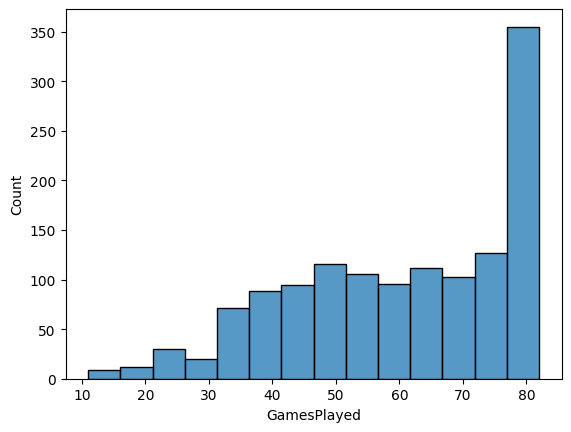

In [82]:
sns.histplot(df['GamesPlayed'])

<Axes: xlabel='MinutesPlayed', ylabel='Count'>

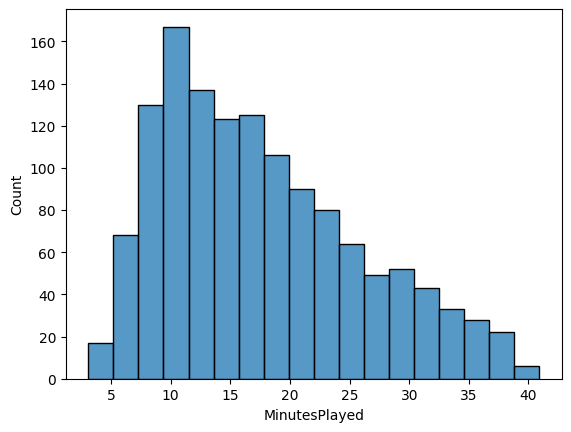

In [83]:
sns.histplot(df['MinutesPlayed'])

<Axes: xlabel='PointsPerGame', ylabel='Count'>

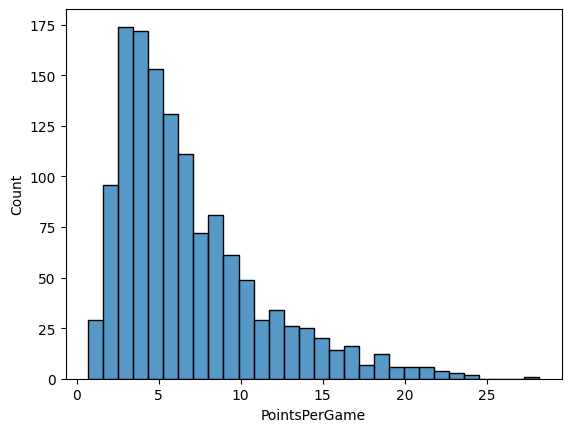

In [84]:
sns.histplot(df['PointsPerGame'])

<Axes: xlabel='FieldGoalsMade', ylabel='Count'>

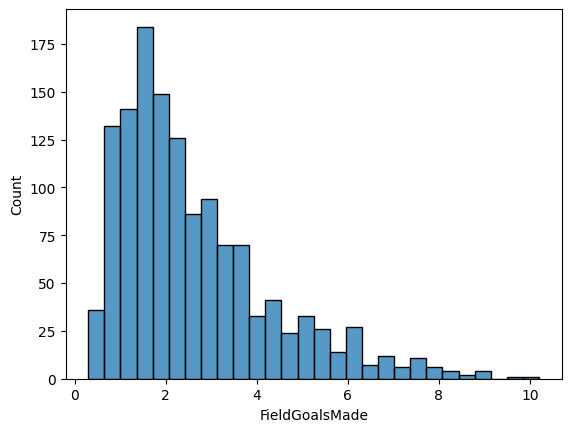

In [85]:
sns.histplot(df['FieldGoalsMade'])

<Axes: xlabel='3PointMade', ylabel='Count'>

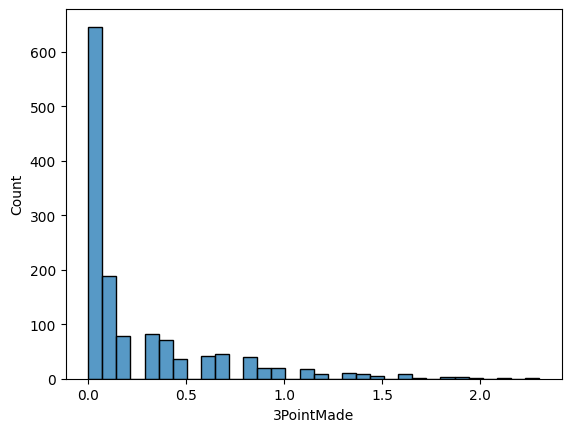

In [86]:
sns.histplot(df['3PointMade'])

<Axes: xlabel='FreeThrowMade', ylabel='Count'>

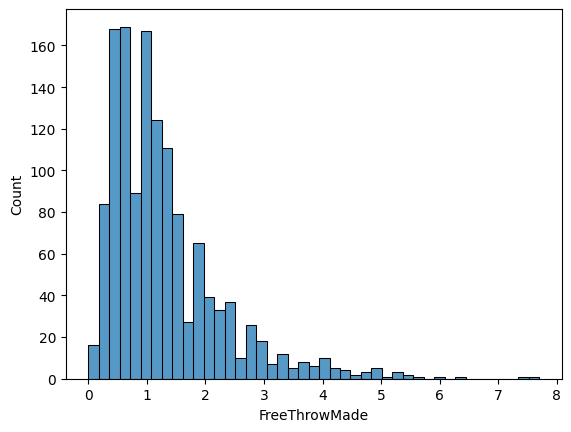

In [87]:
sns.histplot(df['FreeThrowMade'])

<Axes: xlabel='OffensiveRebounds', ylabel='Count'>

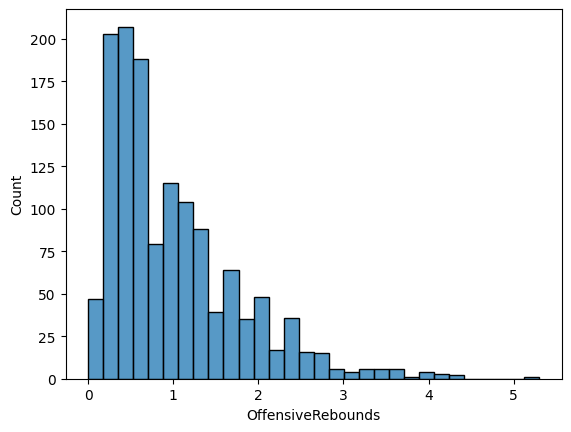

In [88]:
sns.histplot(df['OffensiveRebounds'])

<Axes: xlabel='DefensiveRebounds', ylabel='Count'>

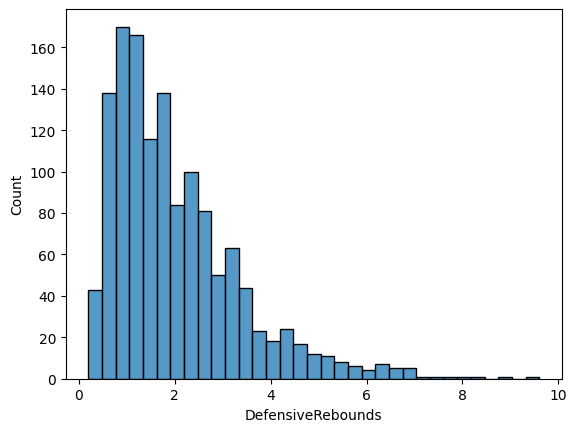

In [89]:
sns.histplot(df['DefensiveRebounds'])

<Axes: xlabel='Assists', ylabel='Count'>

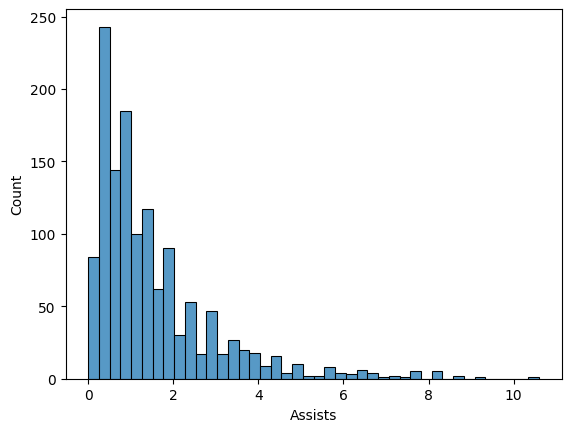

In [90]:
sns.histplot(df['Assists'])

<Axes: xlabel='Steals', ylabel='Count'>

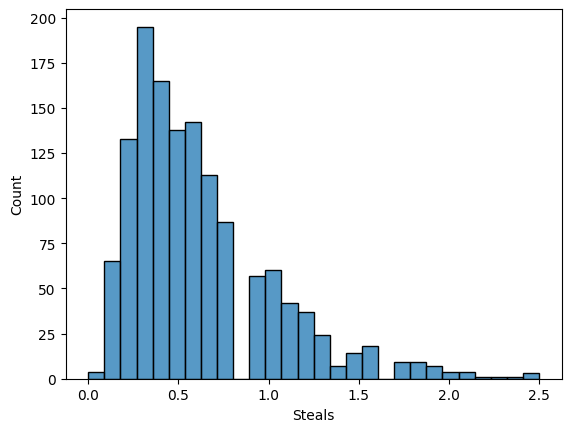

In [91]:
sns.histplot(df['Steals'])

<Axes: xlabel='Blocks', ylabel='Count'>

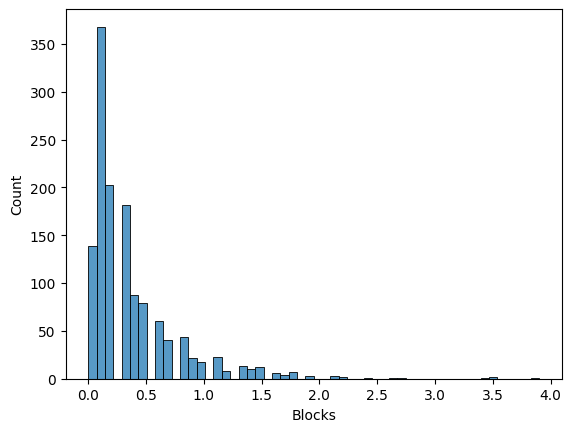

In [92]:
sns.histplot(df['Blocks'])

<Axes: xlabel='Turnovers', ylabel='Count'>

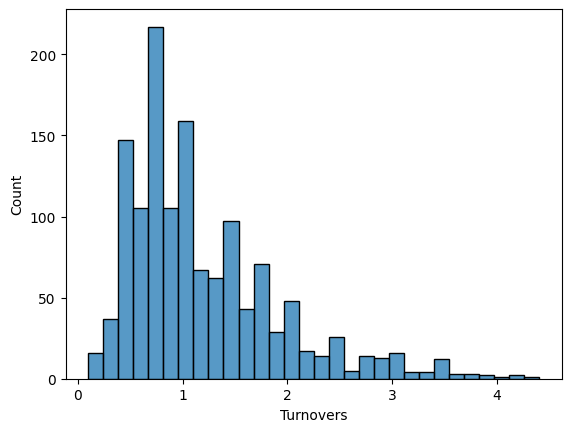

In [93]:
sns.histplot(df['Turnovers'])

All of the data is more or less normally distributed, with some exceptions. There are some features that have some suspicios 'outliers?', like Blocks or maybe assists? We can check if these are really outliers.

In [94]:
var = np.var(df['Blocks'])
mean = np.mean(df['Blocks'])
var, mean

(0.183945750723992, 0.3685820895522388)

In [95]:
from statistics import NormalDist
1 - NormalDist(mu=mean, sigma=var).cdf(2.5)

0.0

In [96]:
z_score = (2.5 - mean) / var
z_score # z_score >= 3 is considered high

11.587209283490997

As I have shown above, if the Blocks feature is  normally distributed, the chance of it having values over 2.5 is very, very low. Practically zero. The think is that it doesn't look like normally distributed as the domain are positive numbers and we can see the left tail of the data is cut off. I don't know what to do do be honest, but I will leave it like that.

#### Extract numeric data only

In [97]:
df_num = df.drop(columns=['Name'])

<Axes: >

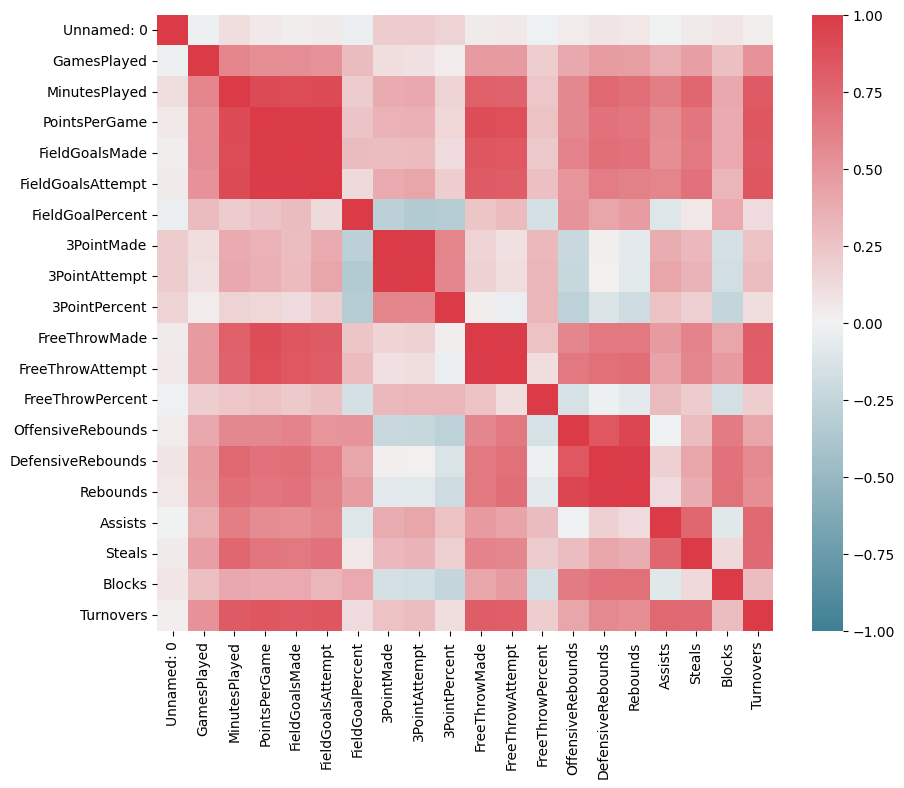

In [98]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_num.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

# TODO ANALYSE THE CORRELATION MATRIX

<Axes: xlabel='MinutesPlayed', ylabel='PointsPerGame'>

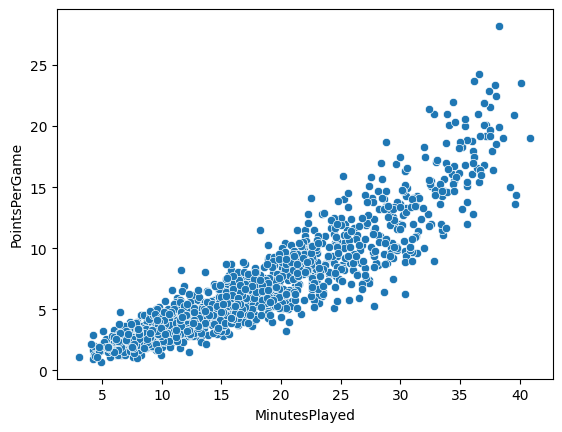

In [99]:
sns.scatterplot(x=df['MinutesPlayed'], y=df['PointsPerGame'])

There is obvious correlation between minutes played and points per game. There is a reason why some players play more than others... Not only the players that play more are getting better, but also coaches are choosing the players that are scoring more points.